In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm




gdp = pd.read_csv('gdp.csv')
thrift = pd.read_csv('thrift.csv')
vintage = pd.read_csv('vintage.csv')
fast_sustainable = pd.read_csv('fast_sustainable.csv')



In [59]:
gdp.head() 

# dropping all countries except for United States 
gdp = gdp[gdp['Country Name'] == 'United States']

# dropping all rows with NaN values
gdp = gdp.dropna()

# dropping irrelevant columns

gdp = gdp.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

# melting the data to remove the years as columns 

gdp = gdp.melt(id_vars=['Country Name'], var_name='Year', value_name='GDP')

# converting the Year column to int

gdp['Year'] = gdp['Year'].astype(int)

# dropping all rows with years less than 2004

gdp = gdp[gdp['Year'] >= 2004]

# converting the gdp column to float

gdp['GDP'] = gdp['GDP'].astype(float)

# converting it from significant figures to trillions

gdp['GDP'] = gdp['GDP'] / 1000000000000

gdp.head()



In [62]:
# extracting the year from the date column which has the following format 'YYYY-MM' 

thrift['Year'] = thrift['month'].str.extract(r'(\d{4})')

# dropping the Month column
google = thrift.drop(columns=['month'])
google['Year'] = google['Year'].astype(int)



In [63]:
# aggregating the keyword_index column by year and adding the values 

thrift = thrift.groupby('Year').sum().reset_index()
google.head()

# merging by year with the gdp data
data = pd.merge(gdp, thrift, on='Year')

# normalizing the data to be able to compare them on the same scale
data['GDP'] = data['GDP'] / data['GDP'].max()
data['keyword_index'] = data['keyword_index'] / data['keyword_index'].max()


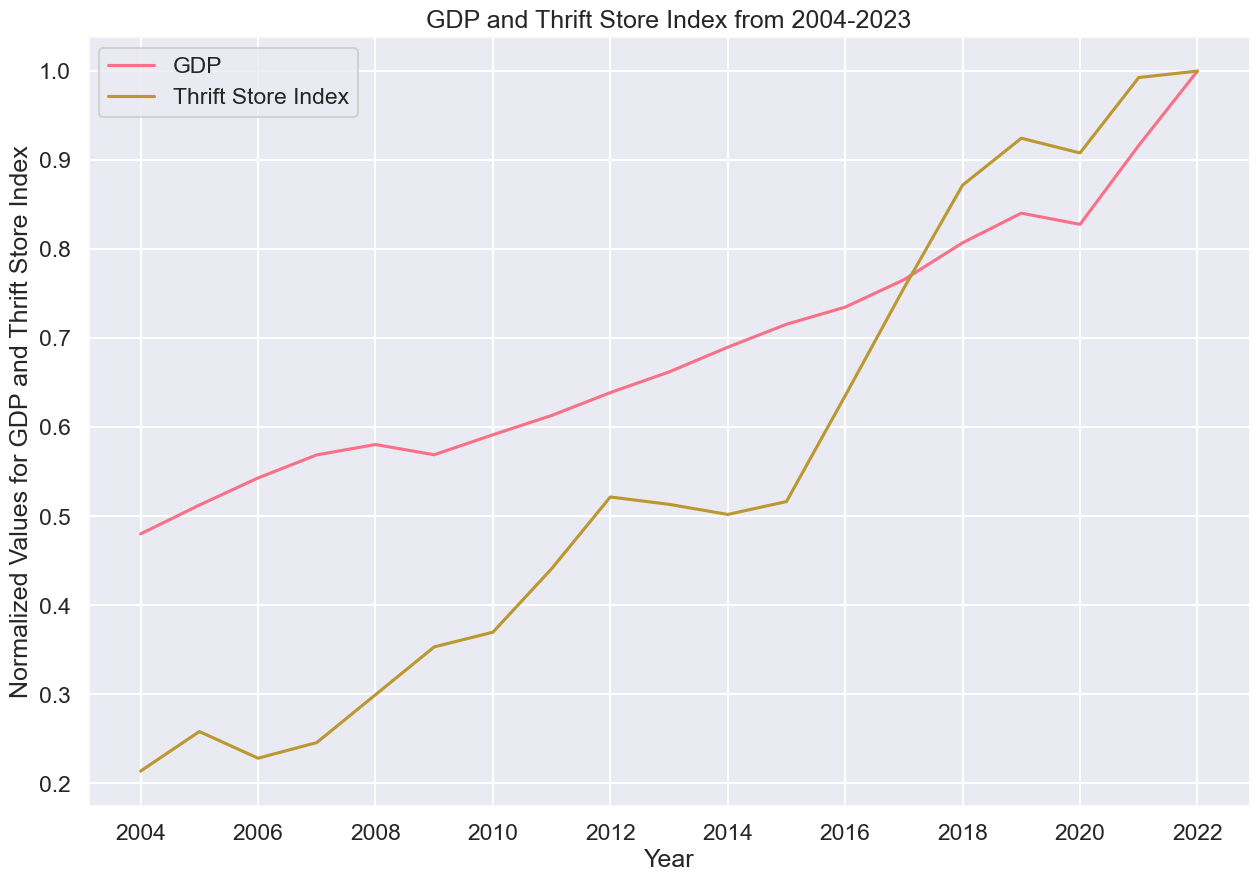

In [64]:
# plotting the data
sns.set_style('darkgrid')

plt.plot(data['Year'], data['GDP'], label='GDP')

plt.plot(data['Year'], data['keyword_index'], label='Thrift Store Index')

plt.xlabel('Year')

plt.ylabel('Normalized Values for GDP and Thrift Store Index')

plt.title('GDP and Thrift Store Index from 2004-2023')

plt.xticks(np.arange(2004, 2024, 2))

plt.legend()

plt.show()








In [65]:
# correlation between gdp and keyword_index
data['GDP'].corr(data['keyword_index'])

0.9704540202874224

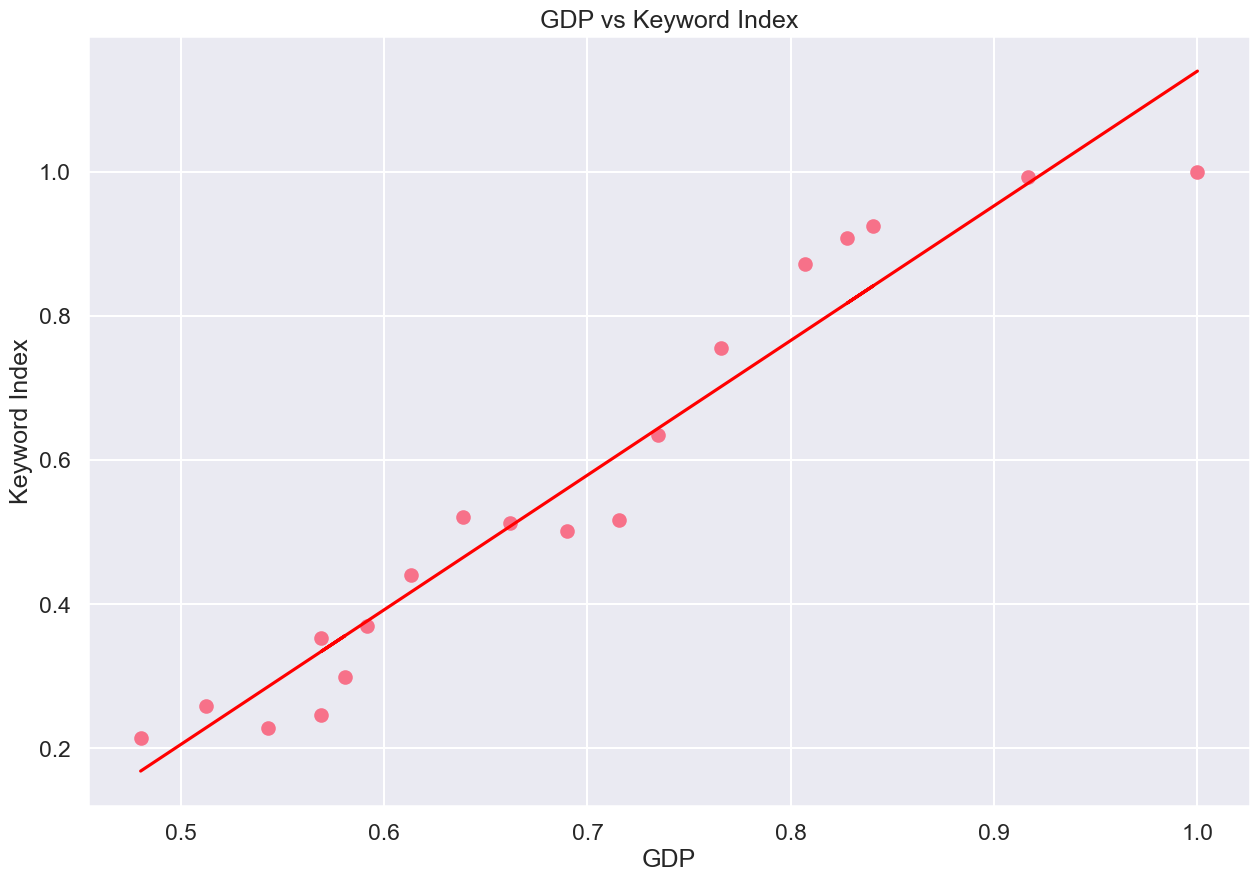

In [66]:
# linear regression

X = data[['GDP']]

y = data['keyword_index']

model = LinearRegression()

model.fit(X, y)

# plotting the regression line

plt.scatter(data['GDP'], data['keyword_index'])

plt.plot(data['GDP'], model.predict(X), color='red')

plt.xlabel('GDP')

plt.ylabel('Keyword Index')

plt.title('GDP vs Keyword Index')

plt.show()



In [67]:
# vintage store data 

# converting date to year by extracting the year from the month column 

vintage['Year'] = vintage['month'].str.extract(r'(\d{4})')

# dropping the month column

vintage = vintage.drop(columns=['month'])

vintage['Year'] = vintage['Year'].astype(int)

# aggregating the vintage column by year and adding the values

vintage = vintage.groupby('Year').sum().reset_index()

vintage.head()

data = pd.merge(data, vintage, on='Year')

data.head()



,Year,vintage
0,2004,747
1,2005,671
2,2006,600
3,2007,565
4,2008,652


In [69]:
# changing the name of keyword_index to thrift 
data = data.rename(columns={'keyword_index': 'thrift'})

data.head()


,Country Name,Year,GDP,thrift,vintage
0,United States,2004,0.480242,0.213843,747
1,United States,2005,0.512553,0.258264,671
2,United States,2006,0.543072,0.228306,600
3,United States,2007,0.568961,0.245868,565
4,United States,2008,0.580585,0.299587,652


In [70]:
# normalizing vintage 

data['vintage'] = data['vintage'] / data['vintage'].max()

data.head()

,Country Name,Year,GDP,thrift,vintage
0,United States,2004,0.480242,0.213843,0.774093
1,United States,2005,0.512553,0.258264,0.695337
2,United States,2006,0.543072,0.228306,0.621762
3,United States,2007,0.568961,0.245868,0.585492
4,United States,2008,0.580585,0.299587,0.675648


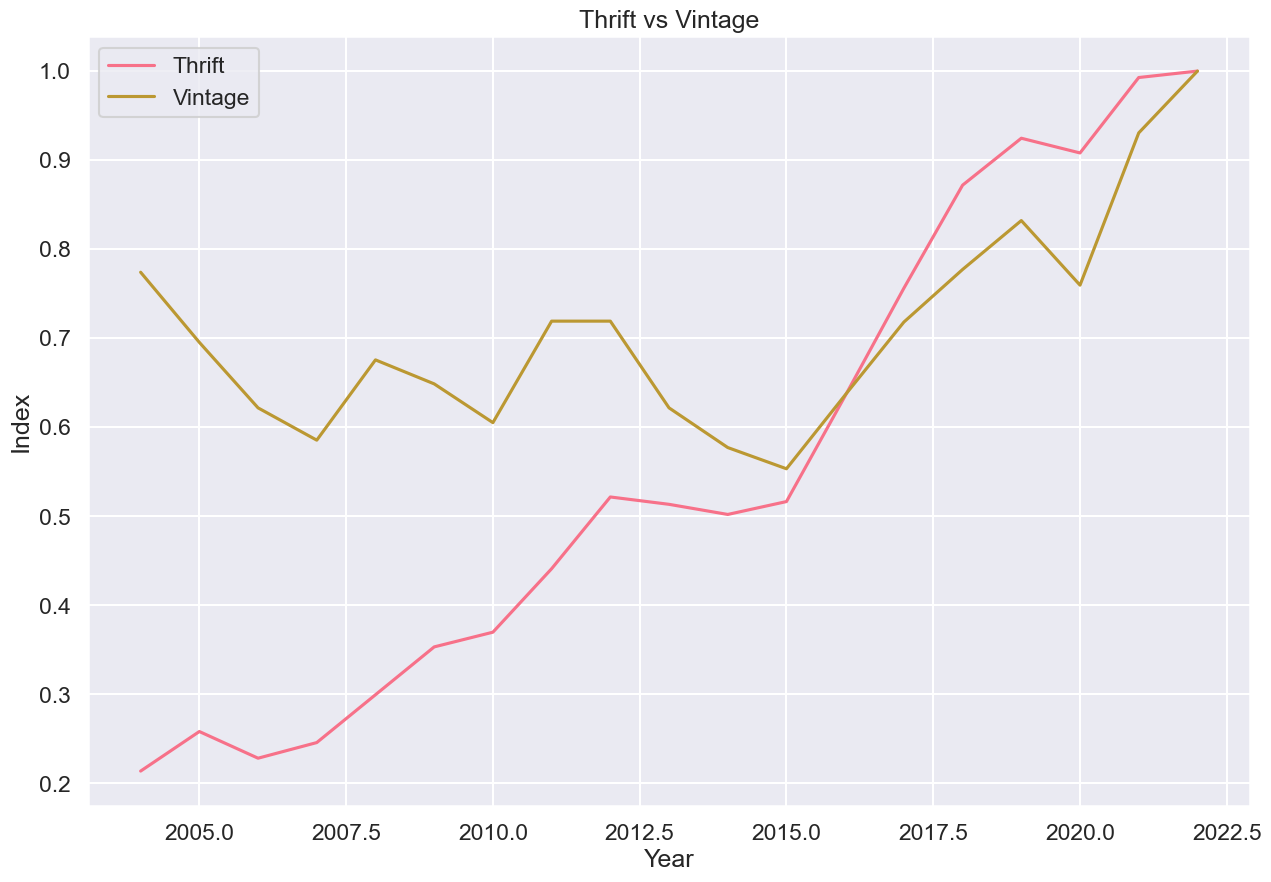

In [71]:
# plotting thrift and vintage by year

sns.lineplot(data=data, x='Year', y='thrift', label='Thrift')

sns.lineplot(data=data, x='Year', y='vintage', label='Vintage')

plt.xlabel('Year')

plt.ylabel('Index')

plt.title('Thrift vs Vintage')

plt.show()

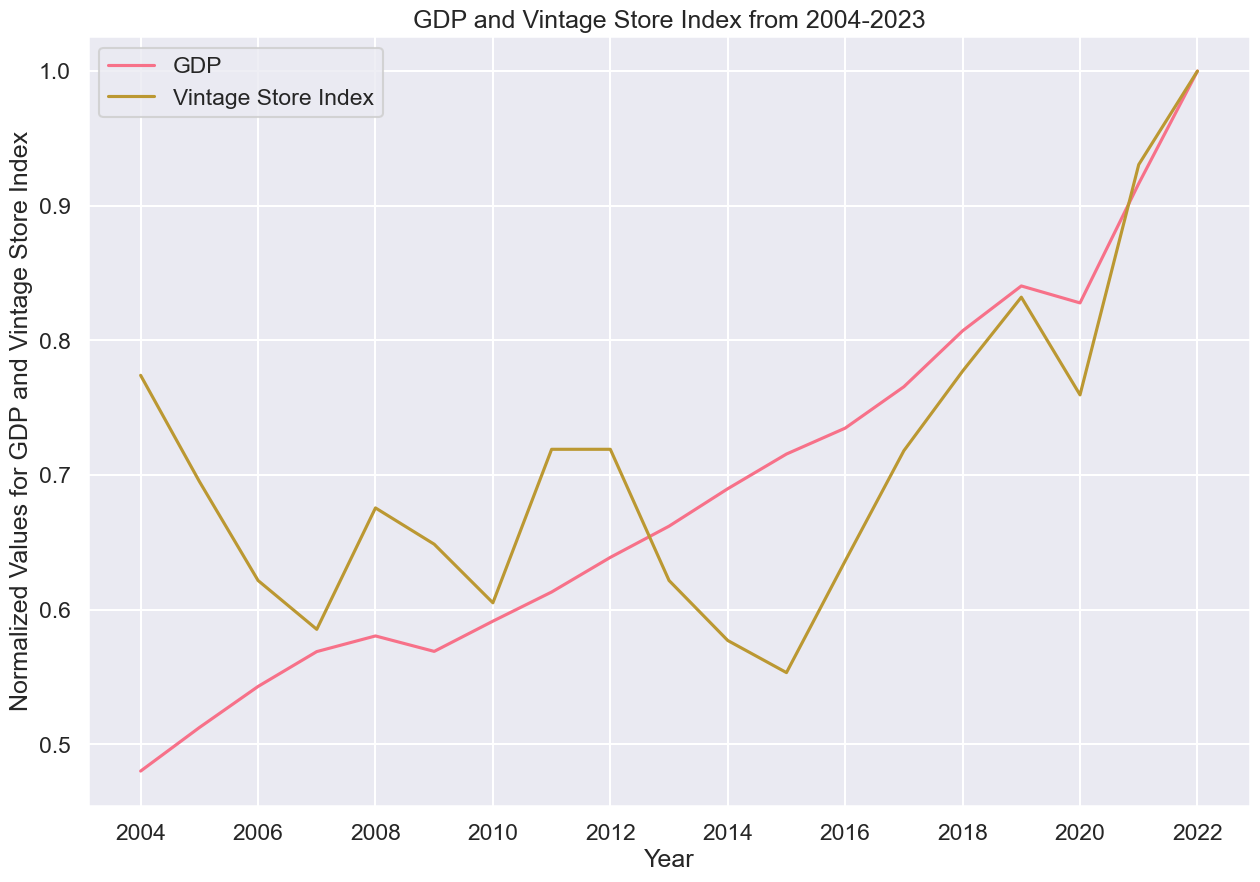

In [72]:
# plotting vintage and gdp 

sns.set_style('darkgrid')

plt.plot(data['Year'], data['GDP'], label='GDP')

plt.plot(data['Year'], data['vintage'], label='Vintage Store Index')

plt.xlabel('Year')

plt.ylabel('Normalized Values for GDP and Vintage Store Index')

plt.title('GDP and Vintage Store Index from 2004-2023')

plt.xticks(np.arange(2004, 2024, 2))

plt.legend()

plt.show()


In [73]:
# correlation between vintage and gdp 

data['vintage'].corr(data['GDP'])

0.6742331807984074

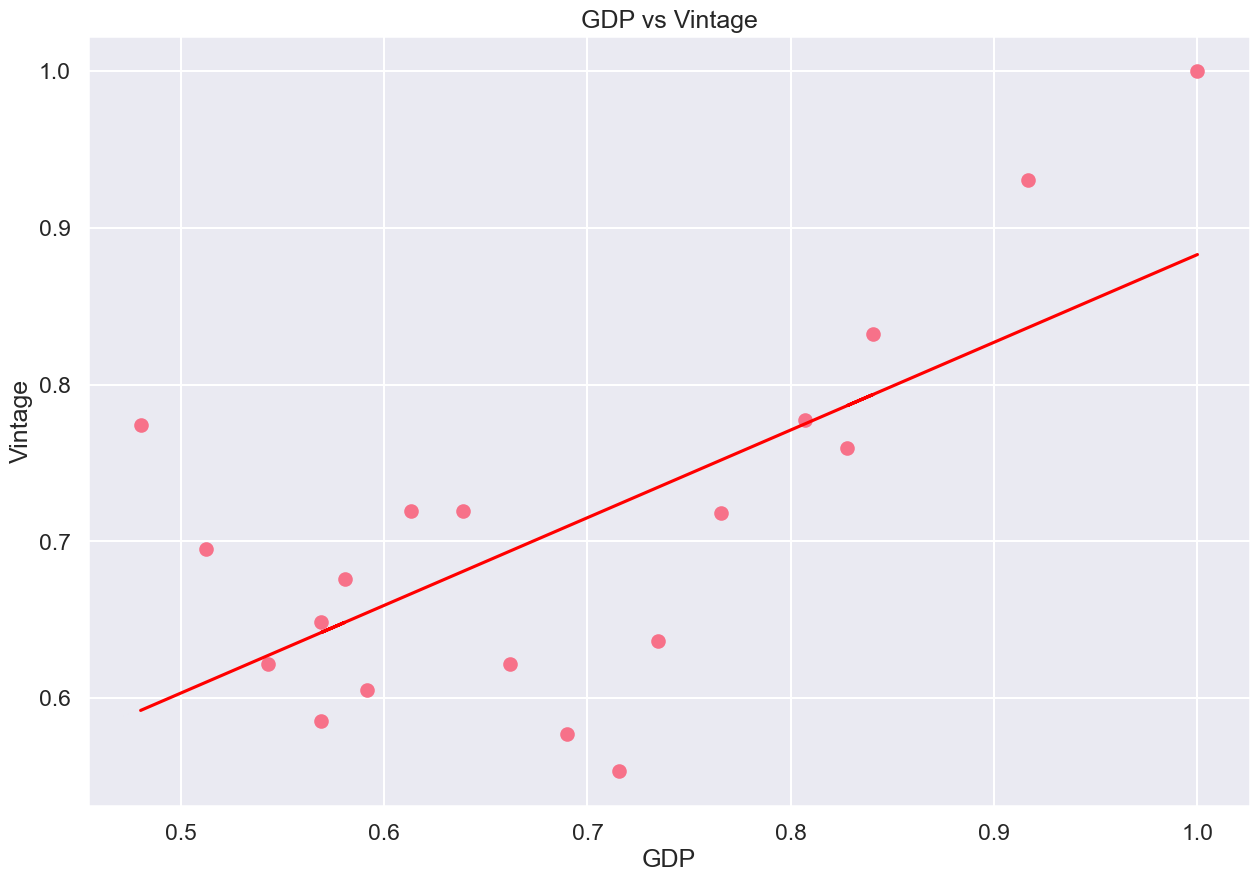

In [74]:
# a linear regression

X = data[['GDP']]
y = data['vintage']

model = LinearRegression()

model.fit(X, y)

plt.scatter(data['GDP'], data['vintage'])

plt.plot(data['GDP'], model.predict(X), color='red')

plt.xlabel('GDP')

plt.ylabel('Vintage')

plt.title('GDP vs Vintage')

plt.show()



In [75]:
# score of the model
model.score(X, y)

0.4545903820895375

In [76]:
# fastfashion and sustainable clothing  data

# pre-processing

fast_sustainable['Year'] = fast_sustainable['month'].str.extract(r'(\d{4})')
fast_sustainable = fast_sustainable.drop(columns=['month'])
fast_sustainable['Year'] = fast_sustainable['Year'].astype(int)
fast_sustainable = fast_sustainable.groupby('Year').sum().reset_index()
fast_sustainable.head()
data = pd.merge(data, fast_sustainable, on='Year')
data['sustainable_clothing'] = data['sustainable_clothing'] / data['sustainable_clothing'].max()
data['fast_fashion'] = data['fast_fashion'] / data['fast_fashion'].max()
data.head()



,Year,sustainable_clothing,fast_fashion
0,2004,0,0
1,2005,0,0
2,2006,0,0
3,2007,28,0
4,2008,0,0


Text(0.5, 1.0, 'Sustainable Clothing vs Fast Fashion')

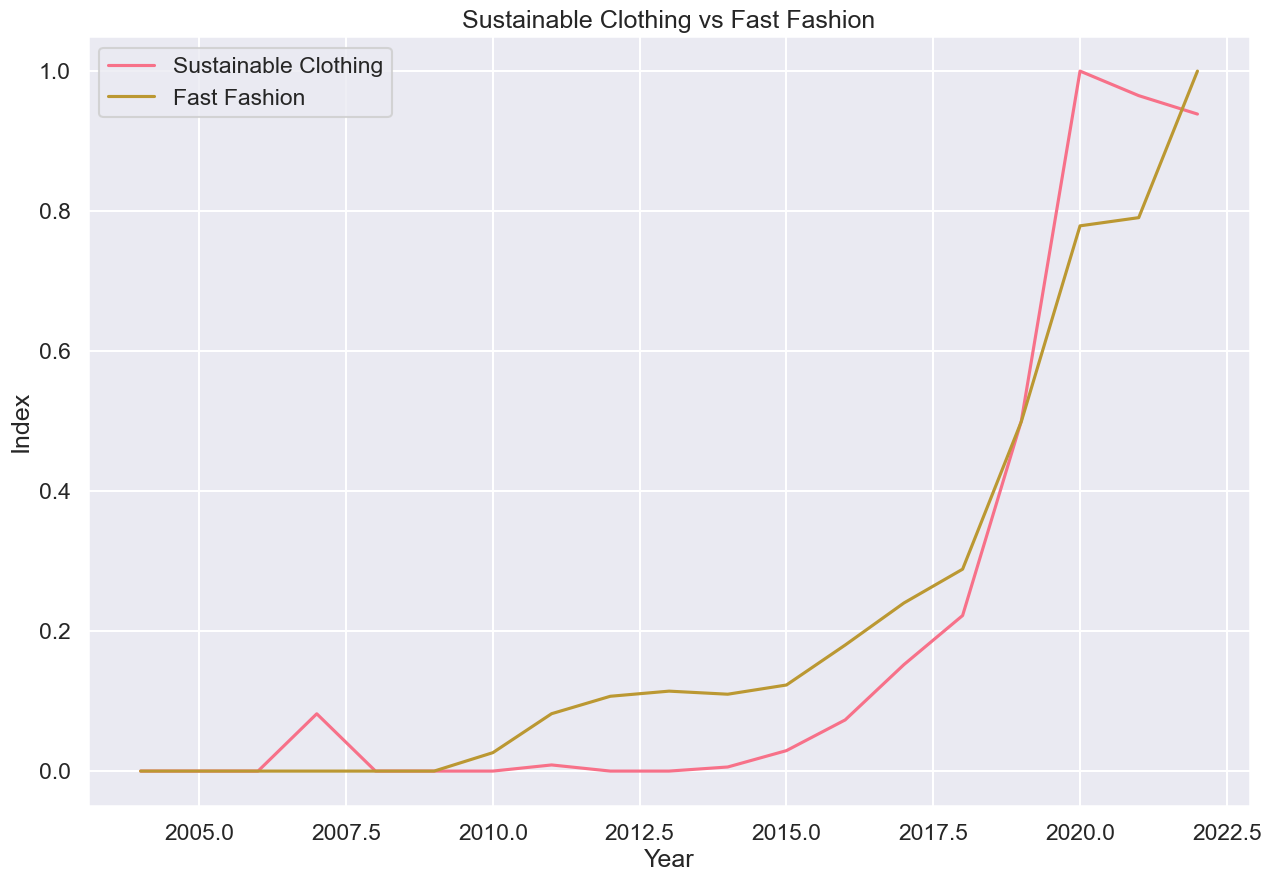

In [79]:
# plotting sustainable_clothing and fast_fashion by year

sns.lineplot(data=data, x='Year', y='sustainable_clothing', label='Sustainable Clothing')

sns.lineplot(data=data, x='Year', y='fast_fashion', label='Fast Fashion')

plt.xlabel('Year')

plt.ylabel('Index')

plt.title('Sustainable Clothing vs Fast Fashion')




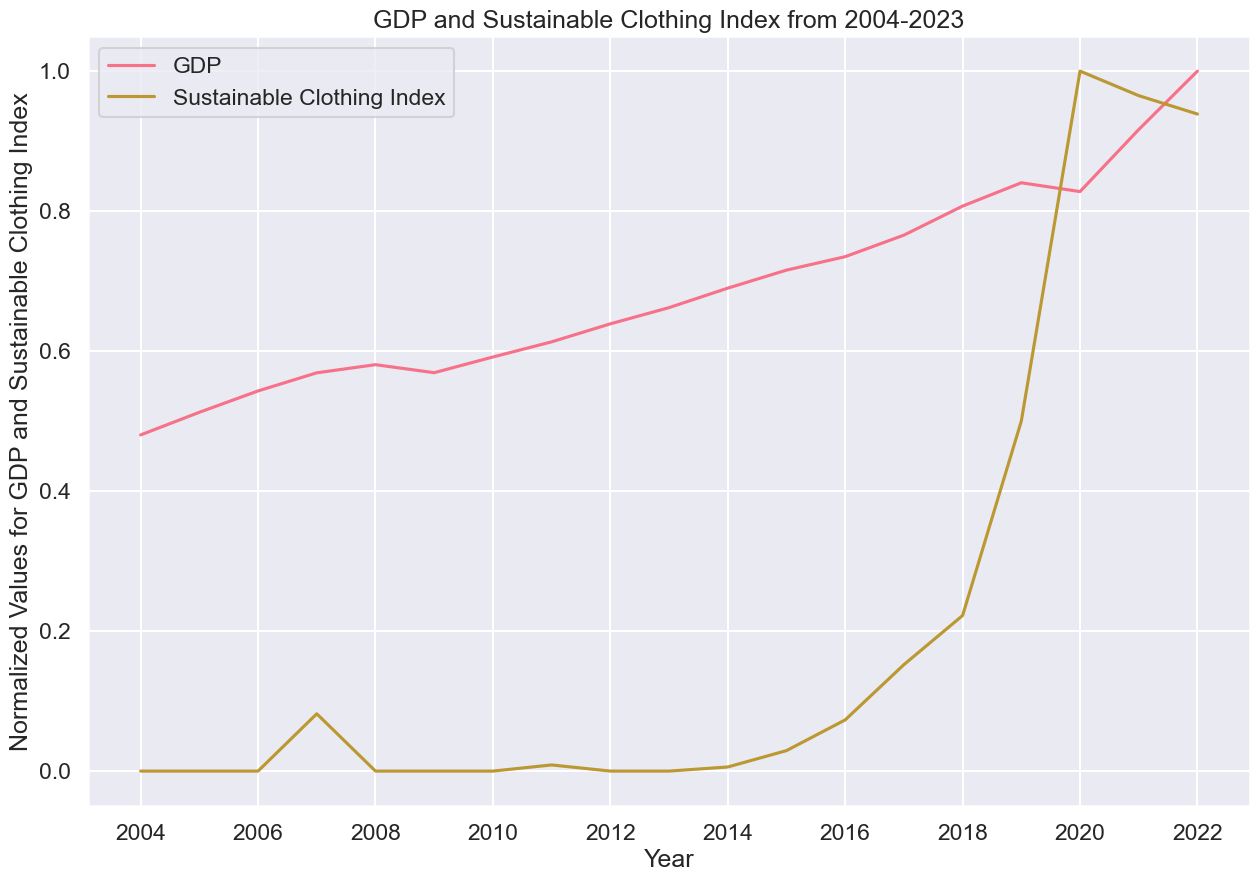

In [87]:
# plottinmg sustainable_clothing and gdp

sns.set_style('darkgrid')

plt.plot(data['Year'], data['GDP'], label='GDP')

plt.plot(data['Year'], data['sustainable_clothing'], label='Sustainable Clothing Index')

plt.xlabel('Year')

plt.ylabel('Normalized Values for GDP and Sustainable Clothing Index')

plt.title('GDP and Sustainable Clothing Index from 2004-2023')

plt.xticks(np.arange(2004, 2024, 2))

plt.legend()

plt.show()



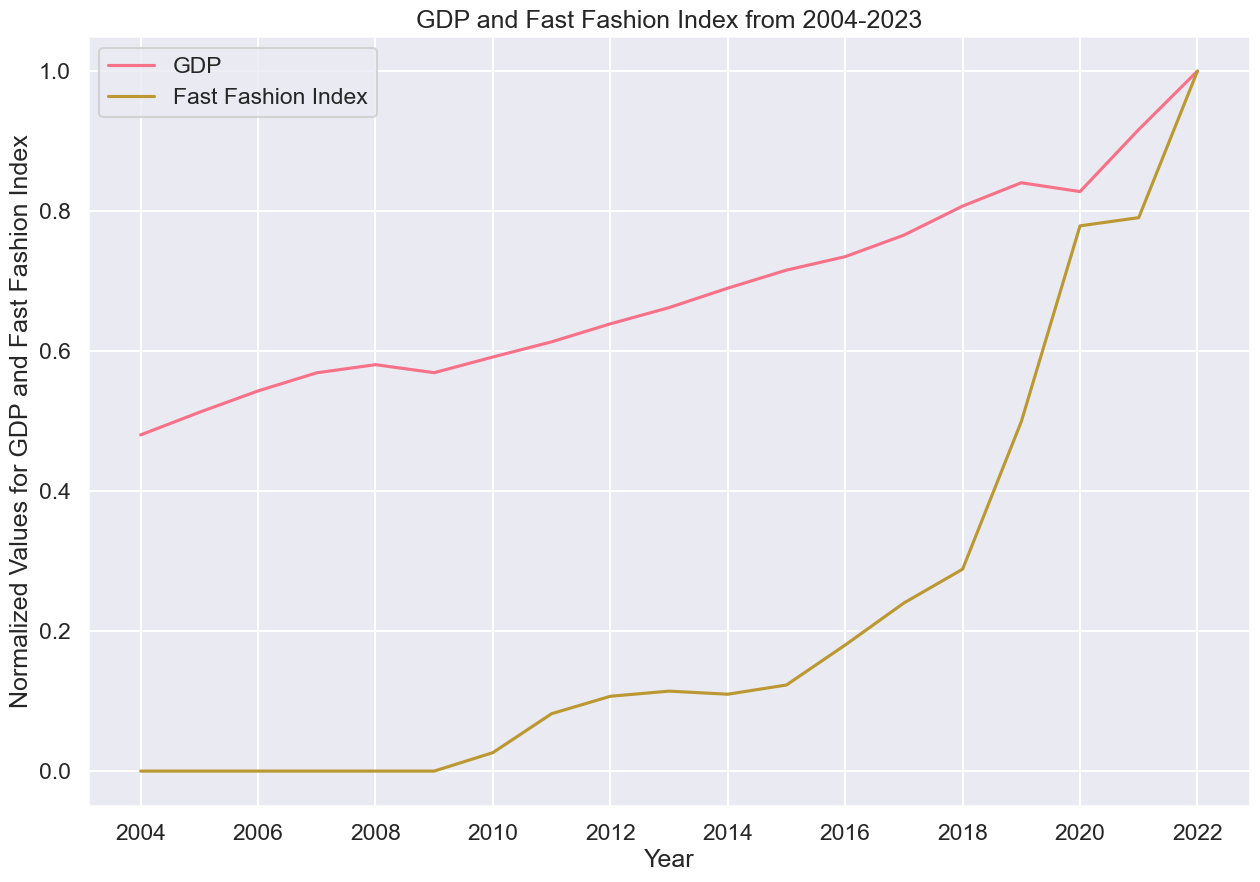

In [88]:
# plotting fast_fashion and gdp

sns.set_style('darkgrid')

plt.plot(data['Year'], data['GDP'], label='GDP')

plt.plot(data['Year'], data['fast_fashion'], label='Fast Fashion Index')

plt.xlabel('Year')

plt.ylabel('Normalized Values for GDP and Fast Fashion Index')

plt.title('GDP and Fast Fashion Index from 2004-2023')

plt.xticks(np.arange(2004, 2024, 2))

plt.legend()

plt.show()




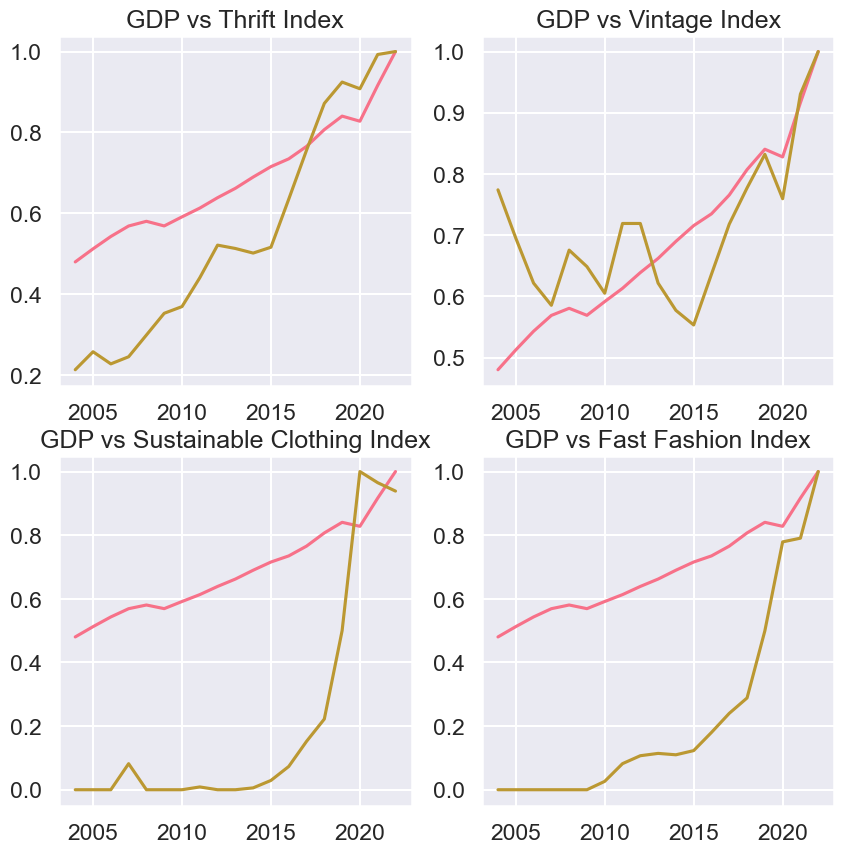

In [90]:
# plotting each index vs gdp together in 4 subplots 

# thirft store index
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot(data['Year'], data['GDP'], label='GDP')

axs[0, 0].plot(data['Year'], data['thrift'], label='Thrift Index')

axs[0, 0].set_title('GDP vs Thrift Index')

# vintage store index
axs[0, 1].plot(data['Year'], data['GDP'], label='GDP')

axs[0, 1].plot(data['Year'], data['vintage'], label='Vintage Index')

axs[0, 1].set_title('GDP vs Vintage Index')


# sustainable clothing index
axs[1, 0].plot(data['Year'], data['GDP'], label='GDP')

axs[1, 0].plot(data['Year'], data['sustainable_clothing'], label='Sustainable Clothing Index')

axs[1, 0].set_title('GDP vs Sustainable Clothing Index')


# fast fashion index
axs[1, 1].plot(data['Year'], data['GDP'], label='GDP')

axs[1, 1].plot(data['Year'], data['fast_fashion'], label='Fast Fashion Index')

axs[1, 1].set_title('GDP vs Fast Fashion Index')

plt.show()







In [82]:
# correlation between fast_fashion and gdp

data['fast_fashion'].corr(data['GDP'])



0.9153581143017273

In [83]:
# correlation between sustainable clothing and gdp
data['sustainable_clothing'].corr(data['GDP'])

0.8277886191463757

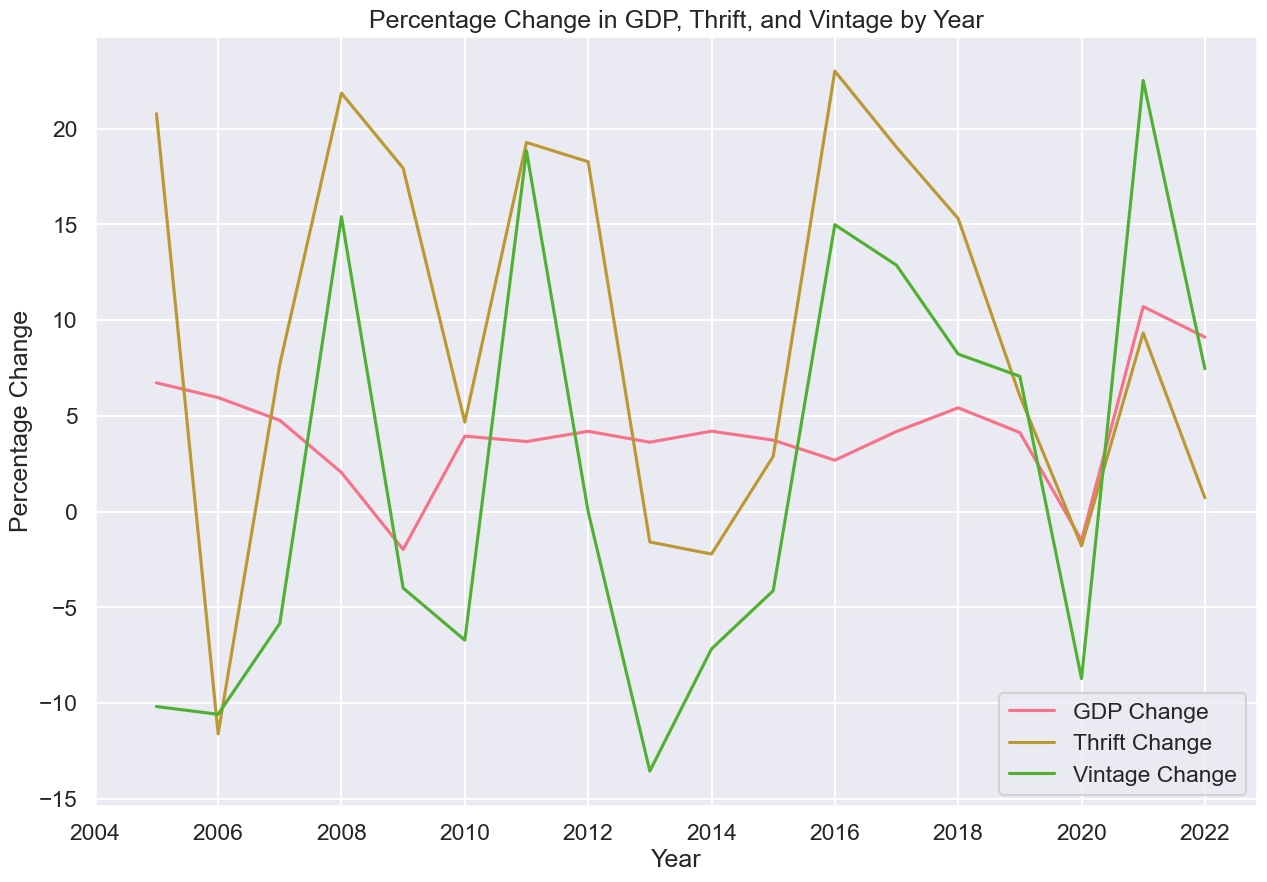

In [97]:
# plotting the percentage change in GDP, thrift, and vintage by year all together in one plot

data['GDP_change'] = data['GDP'].pct_change() * 100

data['thrift_change'] = data['thrift'].pct_change() * 100

data['vintage_change'] = data['vintage'].pct_change() * 100

sns.lineplot(data=data, x='Year', y='GDP_change', label='GDP Change')

sns.lineplot(data=data, x='Year', y='thrift_change', label='Thrift Change')

sns.lineplot(data=data, x='Year', y='vintage_change', label='Vintage Change')

plt.xlabel('Year')

plt.ylabel('Percentage Change')

plt.xticks(np.arange(2004, 2024, 2))


plt.title('Percentage Change in GDP, Thrift, and Vintage by Year')

plt.show()




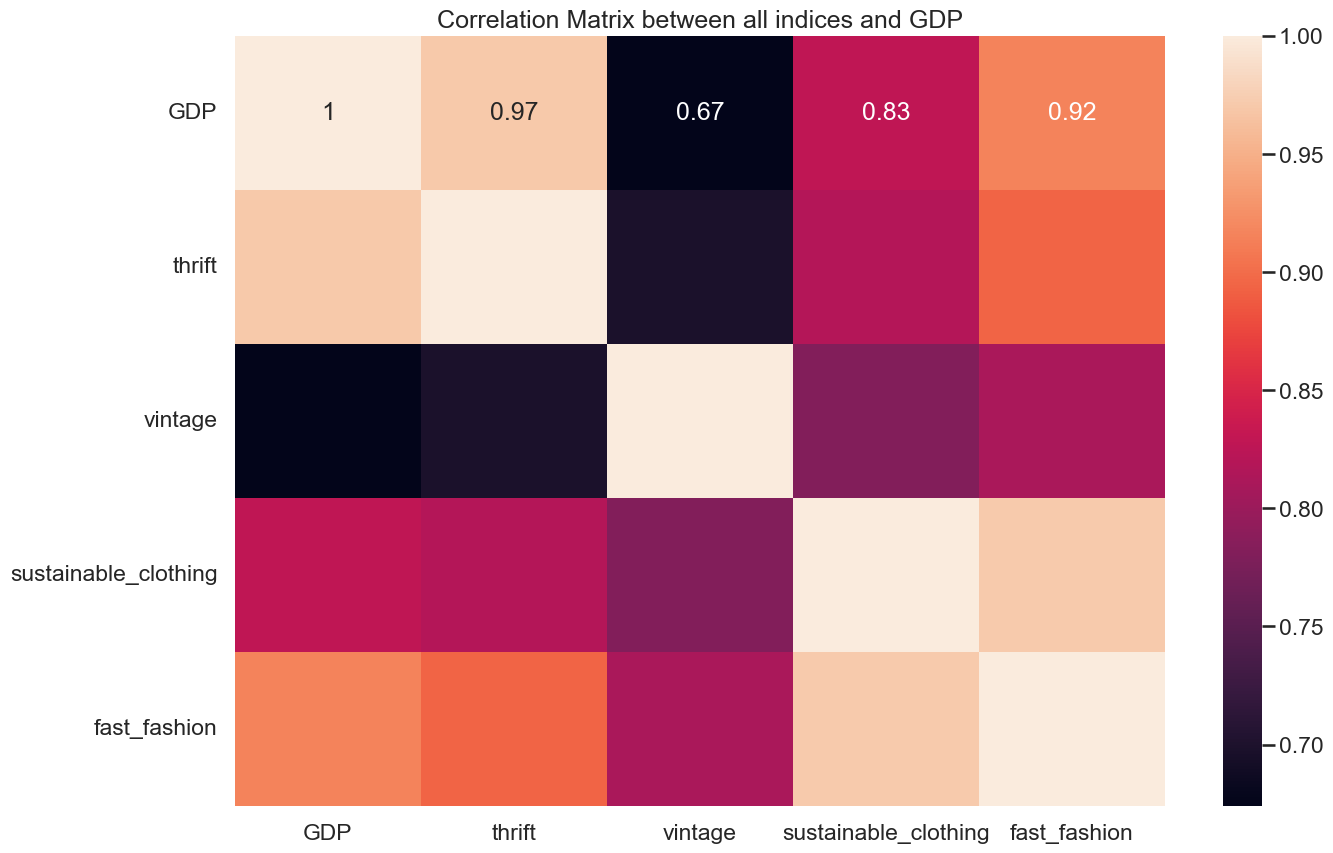

In [103]:
# correlation matrix between all the variables except year

# removing irrelevant columns

data_corr = data.drop(columns=['fast_fashion_change', 'thrift_change', 'vintage_change','GDP_change', "Year"])

sns.heatmap(data_corr.corr(), annot=True)

plt.title('Correlation Matrix between all indices and GDP')

plt.show()

In [84]:
# multivariate linear regression with sustainable clothing being the dependent variable and thrift, vintage, and gdp being the independent variables

X = data[['thrift', 'vintage', 'GDP', 'fast_fashion']]

y = data['sustainable_clothing']

model = LinearRegression()

model.fit(X, y)

model.score(X, y)



0.9740522253332322

In [85]:
# ols regression to analyze the coefficients of the model

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     sustainable_clothing   R-squared:                       0.974
Model:                              OLS   Adj. R-squared:                  0.967
Method:                   Least Squares   F-statistic:                     131.4
Date:                  Fri, 21 Jun 2024   Prob (F-statistic):           6.19e-11
Time:                          11:24:51   Log-Likelihood:                 27.728
No. Observations:                    19   AIC:                            -45.46
Df Residuals:                        14   BIC:                            -40.73
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0591      0.339      3.125      0.007       0.332       1.786
thrift           0.3026      0.242      1.248      0.232      -0.217       0.823
vintage         -0.3944      0.242     -1.631      0.125      -0.913       0.124
GDP             -1.6408      0.541     -3.032      0.009      -2.802      -0.480
fast_fashion     1.7033      0.165     10.309      0.000       1.349       2.058
==============================================================================
Omnibus:                        2.819   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                1.569
Skew:                           0.700   Prob(JB):                        0.456
Kurtosis:                       3.153   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# OLS regression with fast_fashion as y and the other variables as X
X = data[['GDP', 'sustainable_clothing', 'thrift', 'vintage']]
y = data['fast_fashion']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           fast_fashion   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     326.0
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.21e-13
Time:                        11:24:51   Log-Likelihood:                 39.022
No. Observations:                  19   AIC:                            -68.04
Df Residuals:                      14   BIC:                            -63.32
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.7358      0.144     -5.115      0.000      -1.044      -0.427
GDP                      1.0656      0.258      4.128      0.001       0.512       1.619
sustainable_clothing     0.5187      0.050     10.309      0.000       0.411       0.627
thrift                  -0.1821      0.132     -1.376      0.190      -0.466       0.102
vintage                  0.3170      0.118      2.678      0.018       0.063       0.571
==============================================================================
Omnibus:                        1.244   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.537   Jarque-Bera (JB):                1.073
Skew:                          -0.512   Prob(JB):                        0.585
Kurtosis:                       2.448   Cond. No.                         58.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""